In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from util.data import load_mnist, encode_data
import numpy as np
import matplotlib.pyplot as plt
from algorithms.SaccadeGenerator import SaccadeGenerator
import tensorflow as tf

<IPython.core.display.Javascript object>

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()
x_train, x_test = encode_data(x_train, x_test)

<IPython.core.display.Javascript object>

In [4]:
x_train.shape

(60000, 28, 28)

<IPython.core.display.Javascript object>

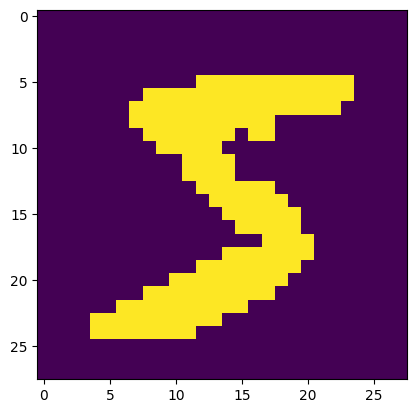

<IPython.core.display.Javascript object>

In [5]:
plt.imshow(x_train[0])

In [6]:
from util.math import get_random_pool_indices
from util.plots import plot_image_with_saccade

<IPython.core.display.Javascript object>

In [7]:
# plot_image_with_saccade(x_train[saccades[3]["data_index"]], saccades[3]["indices"])

<IPython.core.display.Javascript object>

In [24]:
def get_model() -> tf.keras.Model:
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Input(
                shape=[
                    10,
                    27,
                ],
                batch_size=128,
            ),
            tf.keras.layers.LSTM(128),
            tf.keras.layers.Dense(10),
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )

    return model


def fit_model(epochs=5):
    train_gen = SaccadeGenerator(x_train, y_train, (5, 5), 10)
    val_gen = SaccadeGenerator(x_test, y_test, (5, 5), 10)

    model = get_model()

    history = model.fit(
        train_gen, batch_size=128, validation_data=val_gen, epochs=epochs
    )

    return model, history

<IPython.core.display.Javascript object>

In [25]:
model, history = fit_model(20)

Epoch 1/20


2023-01-27 15:12:35.316056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-27 15:12:35.409946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-27 15:12:35.475061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


467/468 [============================>.] - ETA: 0s - loss: 2.0953 - sparse_categorical_accuracy: 0.2246

2023-01-27 15:12:49.798465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-27 15:12:49.858979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


468/468 [==============================] - 17s 35ms/step - loss: 2.0949 - sparse_categorical_accuracy: 0.2248 - val_loss: 1.8664 - val_sparse_categorical_accuracy: 0.3186
Epoch 2/20
468/468 [==============================] - 16s 35ms/step - loss: 1.7307 - sparse_categorical_accuracy: 0.3753 - val_loss: 1.5376 - val_sparse_categorical_accuracy: 0.4451
Epoch 3/20
468/468 [==============================] - 16s 35ms/step - loss: 1.4286 - sparse_categorical_accuracy: 0.4939 - val_loss: 1.3430 - val_sparse_categorical_accuracy: 0.5287
Epoch 4/20
468/468 [==============================] - 16s 34ms/step - loss: 1.2502 - sparse_categorical_accuracy: 0.5626 - val_loss: 1.1588 - val_sparse_categorical_accuracy: 0.5998
Epoch 5/20
468/468 [==============================] - 16s 34ms/step - loss: 1.1464 - sparse_categorical_accuracy: 0.6030 - val_loss: 1.1786 - val_sparse_categorical_accuracy: 0.5894
Epoch 6/20
468/468 [==============================] - 16s 35ms/step - loss: 1.0808 - sparse_categoric

<IPython.core.display.Javascript object>

In [20]:
val_gen = SaccadeGenerator(x_test, y_test, (10, 10), 5)

model.evaluate(val_gen)

78/78 [==============================] - 1s 16ms/step - loss: 0.3044 - sparse_categorical_accuracy: 0.9006


[0.3043769896030426, 0.9006410241127014]

<IPython.core.display.Javascript object>